In [32]:
import pandas as pd
DATASET = "amazon_reviews_us_Grocery_v1_00.tsv"
import logging
import warnings
import sys
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import wordnet
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
logging.disable(sys.maxsize)

sia = SentimentIntensityAnalyzer()



In [8]:
dataset = pd.read_table(DATASET, error_bad_lines=False, header=0, warn_bad_lines=False) 
# there are some malformed entries the dataset... let's ignore those for now


In [9]:
len(dataset.index)

2393379

In [10]:
synonyms = []
for subject in subjects:
    for syn in wordnet.synsets(subject):
        for l in syn.lemmas():
            synonyms.append(l.name())

print(set(synonyms))


NameError: name 'subjects' is not defined

In [ ]:
### Let's see what the dataset looks like... 
dataset.head()


In [ ]:
#lots of nan values... :( 
dataset.isnull().sum()

In [ ]:
# Counts of reviews for same product
dataset['product_id'].value_counts()

In [21]:
# Counts of reviews with same body
dataset['review_body'].value_counts()

Great                                                                                                                                                                                                                                                                                                                                               3592
good                                                                                                                                                                                                                                                                                                                                                3479
great                                                                                                                                                                                                                                                                                                                 

In [19]:
# Counts of reviews with same headline
dataset['review_headline'].value_counts()

Five Stars                                                  335898
Four Stars                                                   46683
Three Stars                                                  22617
One Star                                                     19808
Two Stars                                                    12316
                                                             ...  
no...                                                            1
Simplicity is best                                               1
They are heavenly...                                             1
I ordered the vanilla/pomegranate and received Sing Buri         1
Tea packaged like Donuts.                                        1
Name: review_headline, Length: 1269550, dtype: int64

In [13]:
# Lots of spammy duplicate reviews...might be worth checking if the same person is duplicating the reviews across multiple products
x = dataset[dataset['review_body'].duplicated() == True]
x.head()
print(len(x.index))

175162


In [20]:
#remove NaNs from the dataset  for now...
dataset = dataset.dropna()

In [18]:
dataset["n_reviews"] = dataset.groupby('product_id')['product_id'].transform('count')

In [16]:
dataset.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,n_reviews
0,US,42521656,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",Grocery,5,0.0,0.0,N,Y,Using these for years - love them.,"As a family allergic to wheat, dairy, eggs, nu...",2015-08-31,12
1,US,12049833,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",Grocery,5,0.0,0.0,N,Y,Wonderful,"My favorite nut. Creamy, crunchy, salty, and ...",2015-08-31,473
2,US,107642,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,Grocery,5,0.0,0.0,N,N,Five Stars,This green tea tastes so good! My girlfriend l...,2015-08-31,302
3,US,6042304,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,Grocery,5,0.0,0.0,N,Y,Five Stars,I love Melissa's brand but this is a great sec...,2015-08-31,24
4,US,18123821,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",Grocery,5,0.0,0.0,N,Y,Five Stars,good,2015-08-31,17


In [33]:
#nltk.download('vader_lexicon')

def sentiment_heuristic(row):
    return sia.polarity_scores(row)['compound']


In [37]:
sia.polarity_scores("Five Stars")['compound']

0.0

In [18]:
# This will take ages to run lol
#dataset['sentiment_score'] = dataset["review_body"].apply(sentiment_heuristic)

In [19]:
dataset.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,n_reviews
0,US,42521656,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",Grocery,5,0.0,0.0,N,Y,Using these for years - love them.,"As a family allergic to wheat, dairy, eggs, nu...",2015-08-31,12
1,US,12049833,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",Grocery,5,0.0,0.0,N,Y,Wonderful,"My favorite nut. Creamy, crunchy, salty, and ...",2015-08-31,473
2,US,107642,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,Grocery,5,0.0,0.0,N,N,Five Stars,This green tea tastes so good! My girlfriend l...,2015-08-31,302
3,US,6042304,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,Grocery,5,0.0,0.0,N,Y,Five Stars,I love Melissa's brand but this is a great sec...,2015-08-31,24
4,US,18123821,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",Grocery,5,0.0,0.0,N,Y,Five Stars,good,2015-08-31,17


In [22]:

def filter_bad_star(row):
    '''
    determine if a row is a negative review based on its score. Potentially extend it to include sentiment analysis 
    and presence of specific negative words 
    '''
    return row["star_rating"].astype(int) <=3

def filter_good_star(row):
    '''
    determine if a row is a positive review based on its score.
    '''
    return row["star_rating"].astype(int) > 3

In [29]:
negative_rows = dataset.loc[filter_bad_star]
negative_rows.head()
len(negative_rows.index)

445115

In [30]:
positive_rows = dataset.loc[filter_good_star]
positive_rows.head()
len(positive_rows.index)

1948123

In [31]:
negative_rows.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,n_reviews
5,US,23649464,RIG9AWFOGRDVO,B00AL6QBZ6,681475449,Herr's Popcorn Hot Cheese 1 Oz (Pack of 30),Grocery,2,1.0,1.0,N,Y,Not Happy,The popcorn was stale.,2015-08-31,8
9,US,19624355,R1ODXB3C9UP3NL,B00J074W94,2499702,"Orgain Organic Plant Based Protein Powder, Pac...",Grocery,1,1.0,3.0,N,N,Disgusting now and difficult on digestion,Used to be a decent product. Disgusting now a...,2015-08-31,522
17,US,22765168,R3T6TTD2IN0EFZ,B00XDXMLL2,971154239,"Skippy Creamy Peanut Butter, with Salted Caram...",Grocery,1,4.0,4.0,N,N,"1 Out Of 5 Of My Co-Workers Thought It Was ""Okay""",I bought this from a local super market on a w...,2015-08-31,6
23,US,35636887,R9MISLBRG08FX,B00DBSFXUA,294404974,"Keebler Town House Pita Crackers, 9.5 Ounce",Grocery,1,0.0,0.0,N,Y,pita crackers,not craze about these. nothing really wrong wi...,2015-08-31,107
26,US,12650237,R2A9O8CWZ1PP74,B0083GJKR2,868929824,"Eclipse Sugar Free Gum, Spearmint, 120 Piece B...",Grocery,3,0.0,0.0,N,Y,Three Stars,it's gum..,2015-08-31,25


In [223]:
positive_rows = dataset.loc[filter_good_star]
positive_rows.head()
len(positive_rows.index)

1948123

In [278]:
bad_words = [
    "stinky",
    "stank"
    "moldy",
    "mouldy",
    "rotted",
    "rotten",
    "stale"
    "stinking",
    "icky",
    "curdled",
    "danger",
    "dangerous",
    "ammonia",
    "unsafe",
    "avoid"
    "sick"
]

# How do we account for spelling mistakes? Do we need to?

def filter_bad_words(row):
    '''
    determine if a row is a negative review based on its words.
    '''
    return row["review_headline"].str.contains("\\b(%s)\\b" % '|'.join(bad_words))


In [284]:
bad_words_rows = negative_rows.loc[filter_bad_words]
len(bad_words_rows.index)

379

In [288]:
bad_words_rows['sentiment_score'] = bad_words_rows["review_body"].apply(sentiment_heuristic)

In [289]:
bad_words_rows.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,n_reviews,sentiment_score
8911,US,37307498,RZP5EWKOBX5KH,B009L9TMBY,696947556,"Deluxe Mixed Nuts Raw, 2Lbs",Grocery,2,1.0,1.0,N,Y,Ixnay on the rotten nuts.,"Probably would have been good, but my nuts were rancid.",2015-08-28,20,-0.7750
22258,US,47973491,R1NOLST0E8IATT,B0036ZIF9Y,923729241,Gemlik Type Black Olives LUX – 1.1lb (500g),Grocery,1,2.0,2.0,N,Y,Mine were rotten and tasted horrible...,"I am Turkish and I've never had any problems with Marmarabirlik olives in my whole life. HOWEVER, this is the first time I've ordered them online and I have to say there were the worst olives I've ever tasted. They were rotten! My Mom even commented that these olives are bad. Maybe I got a bad batch because this company makes one of the very best Turkish olives on the market. I'm extremely disappointed with this online order.",2015-08-24,7,-0.9069
35555,US,30293525,R1FRDE0OIA546B,B00TCOAXR0,915238907,Chung Jung One Anchovy Sauce Blue,Grocery,1,3.0,9.0,N,Y,.It tastes like it was made with rotted anchovies....,The taste is okay....Nothing spectacular....It tastes like it was made with rotted anchovies....<br />The main problem: I braised something using this sauce and my apartment stunk like rotted fish for days....<br />The cheap plastic bottle does not make this product more enticing.....,2015-08-19,3,-0.0772
36783,US,50106447,R2KIR9GSCGNQI6,B002N723Q2,479009963,"Numi Organic Black Tea, Loose Leaf Tea",Grocery,1,1.0,3.0,N,Y,"Good taste, but with rotten flavor","Good taste, but absolutely no flavor, both dry and brewed. Contacted Numi Customer Service. Got careless response, They sent me a couple of tea bags which were much worse than the loose Emperor's Puerh tea. After a month or so it smells rotten. Still taste is OK",2015-08-19,15,-0.9272
54550,US,22365141,RGSXU84MSLDY7,B006GL6N9E,776164341,Fruit Basket Delight with Cheese and Nuts,Grocery,2,0.0,0.0,N,Y,rotten fruit,I sent this to my Mom for Mothers Day and the fruit was rotten! It made me feel terrible.,2015-08-12,159,-0.7712


In [290]:
bad_sentiment_rows = bad_words_rows[bad_words_rows['sentiment_score'] < 0]

In [291]:
len(bad_sentiment_rows.index)

235

In [292]:
bad_sentiment_rows["n_bad_reviews"] = bad_sentiment_rows.groupby('product_id')['product_id'].transform('count')
bad_sentiment_rows["bad_review_percent"] = bad_sentiment_rows["n_bad_reviews"] / negative_rows["n_reviews"]

In [293]:
bad_sentiment_rows.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,n_reviews,sentiment_score,n_bad_reviews,bad_review_percent
8911,US,37307498,RZP5EWKOBX5KH,B009L9TMBY,696947556,"Deluxe Mixed Nuts Raw, 2Lbs",Grocery,2,1.0,1.0,N,Y,Ixnay on the rotten nuts.,"Probably would have been good, but my nuts were rancid.",2015-08-28,20,-0.7750,1,0.050000
22258,US,47973491,R1NOLST0E8IATT,B0036ZIF9Y,923729241,Gemlik Type Black Olives LUX – 1.1lb (500g),Grocery,1,2.0,2.0,N,Y,Mine were rotten and tasted horrible...,"I am Turkish and I've never had any problems with Marmarabirlik olives in my whole life. HOWEVER, this is the first time I've ordered them online and I have to say there were the worst olives I've ever tasted. They were rotten! My Mom even commented that these olives are bad. Maybe I got a bad batch because this company makes one of the very best Turkish olives on the market. I'm extremely disappointed with this online order.",2015-08-24,7,-0.9069,1,0.142857
35555,US,30293525,R1FRDE0OIA546B,B00TCOAXR0,915238907,Chung Jung One Anchovy Sauce Blue,Grocery,1,3.0,9.0,N,Y,.It tastes like it was made with rotted anchovies....,The taste is okay....Nothing spectacular....It tastes like it was made with rotted anchovies....<br />The main problem: I braised something using this sauce and my apartment stunk like rotted fish for days....<br />The cheap plastic bottle does not make this product more enticing.....,2015-08-19,3,-0.0772,1,0.333333
36783,US,50106447,R2KIR9GSCGNQI6,B002N723Q2,479009963,"Numi Organic Black Tea, Loose Leaf Tea",Grocery,1,1.0,3.0,N,Y,"Good taste, but with rotten flavor","Good taste, but absolutely no flavor, both dry and brewed. Contacted Numi Customer Service. Got careless response, They sent me a couple of tea bags which were much worse than the loose Emperor's Puerh tea. After a month or so it smells rotten. Still taste is OK",2015-08-19,15,-0.9272,1,0.066667
54550,US,22365141,RGSXU84MSLDY7,B006GL6N9E,776164341,Fruit Basket Delight with Cheese and Nuts,Grocery,2,0.0,0.0,N,Y,rotten fruit,I sent this to my Mom for Mothers Day and the fruit was rotten! It made me feel terrible.,2015-08-12,159,-0.7712,1,0.006289


In [294]:
# Reviews sorted by proportion of reviews that are 'bad'
sorted = bad_sentiment_rows.sort_values(by=['bad_review_percent', 'n_reviews'], ascending=False)

In [295]:
bad_sentiment_rows['product_id'].value_counts()
bad_sentiment_rows['product_parent'].value_counts()

572710338    3
969947869    2
23413404     2
162663470    2
92995222     2
            ..
479009963    1
979539853    1
193351344    1
381819819    1
127590911    1
Name: product_parent, Length: 229, dtype: int64

<AxesSubplot:ylabel='Density'>

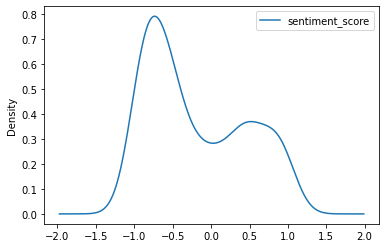

In [297]:
bad_words_rows.plot.kde(y='sentiment_score')

<AxesSubplot:ylabel='Density'>

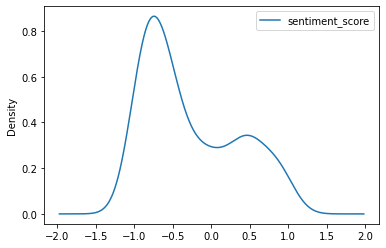

In [298]:
bad_words_rows[bad_words_rows["star_rating"] == 1].plot.kde(y='sentiment_score')

<AxesSubplot:ylabel='Density'>

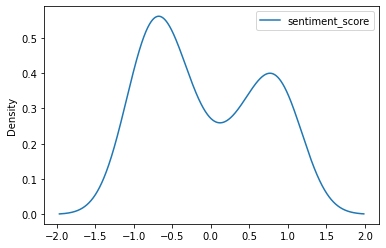

In [299]:
bad_words_rows[bad_words_rows["star_rating"] == 2].plot.kde(y='sentiment_score')

<AxesSubplot:ylabel='Density'>

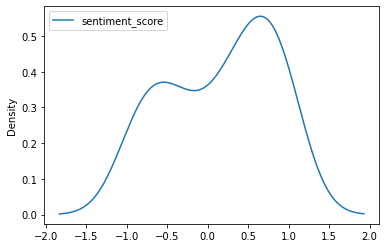

In [300]:
bad_words_rows[bad_words_rows["star_rating"] == 3].plot.kde(y='sentiment_score')

In [310]:
bad_words_rows["star_rating"].astype(int).corr(bad_words_rows["sentiment_score"].astype(float))

0.20571487439616568